In [134]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'  


In [135]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, train_labels.shape, test_images.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

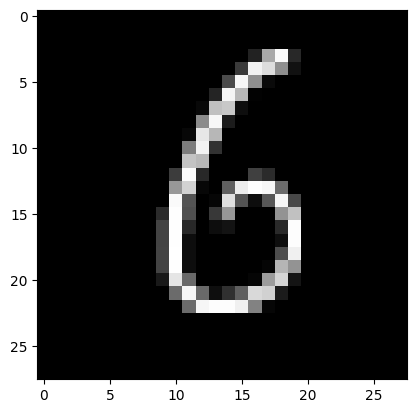

In [136]:
plt.plot()
plt.imshow((train_images[18]), cmap=plt.get_cmap('gray'))
plt.show()

In [137]:
# Normalize
train_images, test_images = train_images / 255, test_images / 255
train_images.shape

(60000, 28, 28)

In [138]:
train_images[0].shape

(28, 28)

In [139]:
train_images.max(), train_images.min()

(1.0, 0.0)

In [140]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [141]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [142]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [151]:
from tensorflow.keras import layers, models

batch_size = 64
num_classes = 1  # Pour une classification binaire

model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')  
])

In [152]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [153]:
model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Précision du modèle sur les données de test:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9736
Précision du modèle sur les données de test: 0.9735999703407288


In [ ]:
model.save('mnist2.keras')

In [ ]:
# batch_size = 64
# num_classes = 1

# model = models.Sequential([
#     layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28, 1)),
#     layers.MaxPool2D(),
#     layers.Dropout(0.25),
#     layers.Conv2D(64, (3,3), padding='same', activation='relu'),
#     layers.MaxPool2D(strides=(2,2)),
#     layers.Dropout(0.25),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax')
# ])

# model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

# model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))


# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print('Précision du modèle sur les données de test:', test_acc)

ValueError: in user code:

    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/root/miniconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((32, 1) vs (32, 10)).


In [ ]:
# model.save('mnist.keras')